In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv("detection_spaces_agg.csv")

In [134]:
df = df[["plot", "frequency", "height", "transmission", "ambient.noise"]]
df = df[df.index%2 == 0]
plot_list = df["plot"].unique().tolist()
height_list = df["height"].unique().tolist()
frequency_list = df["frequency"].unique().tolist()
df = df.sort_values(by=['plot',"frequency"])
df = df[df["frequency"] < 30]

In [135]:
df

,plot,frequency,height,transmission,ambient.noise
0,BF1,0.05,0.1,-9.497076,53.904755
2,BF1,0.05,2.0,-8.564381,53.904755
4,BF1,0.05,5.0,-7.148587,53.904755
6,BF1,0.10,0.1,-9.497076,52.710679
8,BF1,0.10,2.0,-8.564381,52.710679
...,...,...,...,...,...
24080,HR4,28.00,2.0,-12.762490,NaN
24082,HR4,28.00,5.0,-9.797765,NaN
24084,HR4,29.00,0.1,-15.847766,NaN
24086,HR4,29.00,2.0,-13.176566,NaN


In [136]:
column_names = ["height","frequency", "average_attenuation"]
average_df = pd.DataFrame(columns = column_names)

for height in height_list:
    for frequency in frequency_list:
        
        # Get mean across all plots for a given height and frequency
        average = df[(df["frequency"] == frequency) & (df["height"] == height)]["transmission"].mean()
        
        new_row = {"height":height,"frequency":frequency, "average_attenuation": average}
        
        average_df = average_df.append(new_row, ignore_index=True)
            

In [209]:
plot_01 = average_df[average_df["height"] == 0.1].plot(x="frequency",y="average_attenuation")
plot_2 = average_df[average_df["height"] == 2].plot(x="frequency",y="average_attenuation")
plot_5 = average_df[average_df["height"] == 5].plot(x="frequency",y="average_attenuation")

KeyError: 'height'

In [142]:
average_df.head(50)

,height,frequency,average_attenuation
0,0.1,0.05,-9.284953
1,0.1,0.10,-9.284953
2,0.1,0.17,-9.284953
3,0.1,0.25,-9.284953
4,0.1,0.36,-9.284953
5,0.1,0.48,-9.284953
6,0.1,0.50,-9.284953
7,0.1,0.62,-9.445543
8,0.1,0.77,-9.646280
9,0.1,0.95,-9.887164


In [184]:
df = pd.read_csv("data_marler.csv")
df

,Habitat,Frequency,0m,1m,2m,5m,10m
0,OF1,0.35,14.6,13.4,12.4,-0.2,-2.9
1,OF1,0.40,21.8,18.9,10.5,-1.8,0.7
2,OF1,0.50,25.3,25.6,13.4,-0.7,2.2
3,OF1,0.60,28.6,22.4,11.6,0.8,2.3
4,OF1,0.80,38.4,16.2,9.7,0.6,4.6
...,...,...,...,...,...,...,...
211,DFLW2,7.00,33.4,30.0,23.9,30.0,33.7
212,DFLW2,8.00,36.7,35.3,31.6,34.4,36.2
213,DFLW2,9.00,36.1,32.6,29.0,34.6,34.9
214,DFLW2,10.00,40.9,32.8,39.9,36.5,37.7


In [226]:
habitat_list = df["Habitat"].unique().tolist()
height_list = ['0m','1m','2m','5m','10m']
frequency_list = df["Frequency"].unique().tolist()

In [273]:
column_names = ["Frequency",'0m','1m','2m','5m','10m']
average_df_openfield = pd.DataFrame(columns = column_names)
average_df_forest = pd.DataFrame(columns = column_names)

openfield = ["OF1", "OF2"]

forest = ["CF1","DFL1",'DFL2','DFL3','DFL4','DFWL1','DFWL2']

for frequency in frequency_list:
        for height in height_list:
            
            # Get mean across all plots for a given height and frequency
            average = df[(df["Frequency"] == frequency) & ((df["Habitat"] == openfield[0]) | (df["Habitat"] == openfield[1]))][height].mean(skipna=True)
            
            average_df_openfield.at[frequency, height] = average / 100
            
            average_df_openfield["Frequency"] = average_df_openfield.index

average_df_openfield.set_index("Frequency",inplace=True)
            
for frequency in frequency_list:
        for height in height_list:
            
            # Get mean across all plots for a given height and frequency
            average = df[(df["Frequency"] == frequency) & (df["Habitat"] != openfield[0]) & (df["Habitat"] != openfield[1])][height].mean(skipna=True)

            average_df_forest.at[frequency, height] = average / 100

            average_df_forest["Frequency"] = average_df_forest.index

average_df_forest.set_index("Frequency", inplace=True)

In [298]:
average_df_openfield

,0m,1m,2m,5m,10m
Frequency,,,,,
0.35,0.152,0.15,0.1435,0.001,0.0045
0.40,0.2105,0.219,0.1065,-0.0175,0.056
0.50,0.2665,0.285,0.1205,-0.021,0.005
0.60,0.3205,0.2505,0.096,-0.013,0.022
0.80,0.38,0.209,0.08,0.027,0.015
1.00,0.391,0.229,0.0345,0.01,0.0085
1.25,0.3615,0.09,0.041,-0.0045,0.024
1.50,0.331,0.202,0.0405,0.0355,0.0255
1.75,0.2805,0.084,0.0515,0.0285,0.0265


In [326]:
average_df_openfield.index

Float64Index([0.35,  0.4,  0.5,  0.6,  0.8,  1.0, 1.25,  1.5, 1.75,  2.0, 2.25,
               2.5, 2.75,  3.0,  3.5,  4.0,  4.5,  5.0,  6.0,  7.0,  8.0,  9.0,
              10.0, 11.0],
             dtype='float64', name='Frequency')

<Figure size 432x288 with 0 Axes>

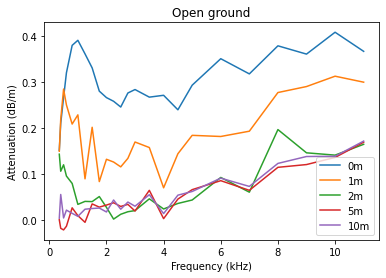

<Figure size 432x288 with 0 Axes>

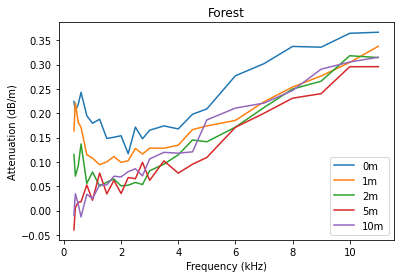

In [408]:
plt.figure()
plot1 = average_df_openfield.plot()
plt.ylabel("Attenuation (dB/m)")
plt.xlabel("Frequency (kHz)")
plt.title("Open ground")
#plt.ylim(top=0.5)
plt.show()

plt.figure()
plot1 = average_df_forest.plot()
plt.ylabel("Attenuation (dB/m)")
plt.xlabel("Frequency (kHz)")
plt.title("Forest")
#plt.ylim(top=0.5)
plt.show()

In [ ]:
plt.figure()
average_df_openfield.T.plot(kind='bar')
plt.show()

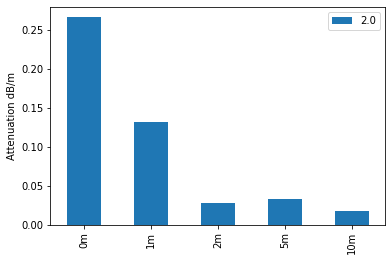

In [384]:


fig = plt.figure()
ax = average_df_openfield.iloc[np.where(average_df_openfield.index.values == frequency_to_plot)[0][0]].T.plot(kind='bar')
#average_df_openfield.iloc[np.where(average_df_openfield.index.values == frequency_to_plot_2)[0][0]].T.plot(kind='bar',color='green',ax=ax)
plt.ylabel("Attenuation dB/m")
plt.legend()
plt.show()

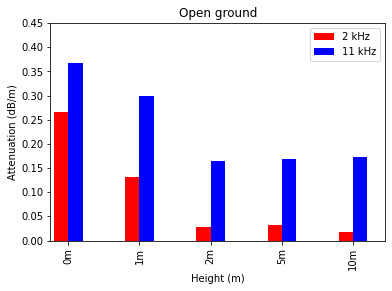

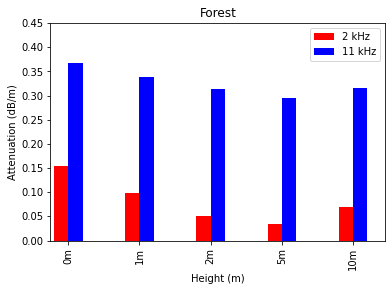

In [402]:
frequency_to_plot = 2
frequency_to_plot_2 = 11

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.2

label1 = str(frequency_to_plot) + " kHz"
label2 = str(frequency_to_plot_2) + " kHz"

df1 = average_df_openfield.iloc[np.where(average_df_openfield.index.values == frequency_to_plot)[0][0]].T.plot(kind='bar', color='red', ax=ax, width=width, position=1,label=label1)
df2 = average_df_openfield.iloc[np.where(average_df_openfield.index.values == frequency_to_plot_2)[0][0]].T.plot(kind='bar', color='blue', ax=ax, width=width, position=0, label=label2)

ax.set_ylabel('Attenuation (dB/m)')
ax.set_xlabel('Height (m)')
ax.set_ylim(top=0.45)


ax.legend()

ax.set_title("Open ground")

plt.show()

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.2

label1 = str(frequency_to_plot) + " kHz"
label2 = str(frequency_to_plot_2) + " kHz"

df1 = average_df_forest.iloc[np.where(average_df_forest.index.values == frequency_to_plot)[0][0]].T.plot(kind='bar', color='red', ax=ax, width=width, position=1,label=label1)
df2 = average_df_forest.iloc[np.where(average_df_forest.index.values == frequency_to_plot_2)[0][0]].T.plot(kind='bar', color='blue', ax=ax, width=width, position=0, label=label2)

ax.set_ylabel('Attenuation (dB/m)')
ax.set_xlabel('Height (m)')
ax.set_ylim(top=0.45)

ax.legend()

ax.set_title("Forest")

plt.show()

In [364]:
average_df_openfield.iloc[np.where(average_df_openfield.index.values == frequency_to_plot)[0][0]].T

0m     0.2665
1m     0.1325
2m      0.028
5m      0.033
10m     0.018
Name: 2.0, dtype: object